In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from model import UNet
    


C:\Users\Fourth\AppData\Local\Temp\ipykernel_4184\4282281385.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/Fourth/models/un

9279.0


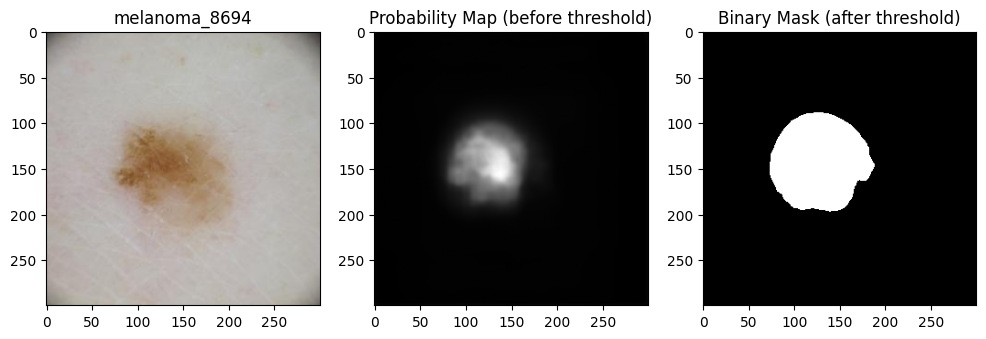

In [29]:
import torch
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import random
from pathlib import Path

# 1. Load model
model = UNet(n_channels=3, n_classes=1, bilinear=False)
model.load_state_dict(torch.load('C:/Users/Fourth/models/unet_dice0.8369_save1746204838.pt', map_location='cpu'))  # adjust path
model.eval()

# 2. Define transforms
transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
])

# Setup path to data folder (WindowsPath objects)
data_path = Path("C:/Users/Fourth/data/")
image_path = data_path / "melanoma_cancer_dataset/"

# Set seed
random.seed() # <- try changing this and see what happens

#Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg")) # array containing image paths

# 3. Load a test image
img_path = random.choice(image_path_list)
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# 4. Inference
with torch.no_grad():
    output = model(input_tensor)  # Already sigmoid inside model
    pred_mask = (output > 0.02).float()

print(pred_mask.sum().item())
# 5. Visualize (without thresholding first)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title(f'{img_path.stem}')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('Probability Map (before threshold)')
plt.imshow(output.squeeze(0).squeeze(0).numpy(), cmap='gray')  # <- visualize sigmoid output directly

plt.subplot(1,3,3)
plt.title('Binary Mask (after threshold)')
plt.imshow(pred_mask.squeeze(0).squeeze(0).numpy(), cmap='gray')

plt.show()



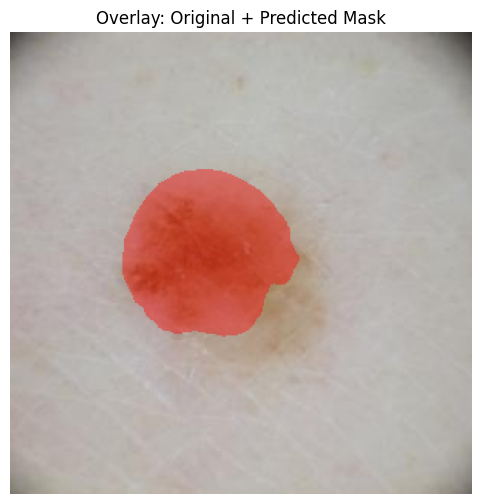

In [30]:
import numpy as np

# Convert original image and mask to NumPy
orig_img_np = np.array(img.resize((300, 300)))  # Make sure dimensions match
mask_np = pred_mask.squeeze().numpy()

# Normalize mask to 0-255 for alpha channel
mask_overlay = (mask_np * 255).astype(np.uint8)

# Create a red overlay mask
red_overlay = np.zeros_like(orig_img_np)
red_overlay[..., 0] = 255  # Red channel only

# Blend: show red where the mask is 1, original where mask is 0
alpha = 0.4  # Transparency
blended = np.where(mask_np[..., None] == 1,
                   (orig_img_np * (1 - alpha) + red_overlay * alpha).astype(np.uint8),
                   orig_img_np)

# Show overlay
plt.figure(figsize=(6, 6))
plt.title("Overlay: Original + Predicted Mask")
plt.imshow(blended)
plt.axis("off")
plt.show()


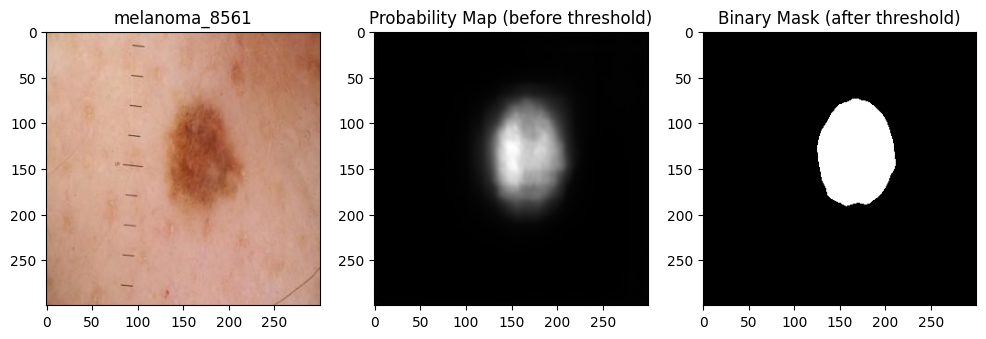

In [16]:

transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
])
# Setup path to data folder (WindowsPath objects)
test_path = Path("C:/Users/Fourth/")
image_path = test_path / "test images/"

#Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*.jpg")) # array containing image paths

# 3. Load a test image
img_path = random.choice(image_path_list)
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# 4. Inference
with torch.no_grad():
    output = model(input_tensor)  # Already sigmoid inside model
    pred_mask = (output > 0.2).float()


# 5. Visualize (without thresholding first)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title(f'{img_path.stem}')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('Probability Map (before threshold)')
plt.imshow(output.squeeze(0).squeeze(0).numpy(), cmap='gray')  # <- visualize sigmoid output directly

plt.subplot(1,3,3)
plt.title('Binary Mask (after threshold)')
plt.imshow(pred_mask.squeeze(0).squeeze(0).numpy(), cmap='gray')

plt.show()

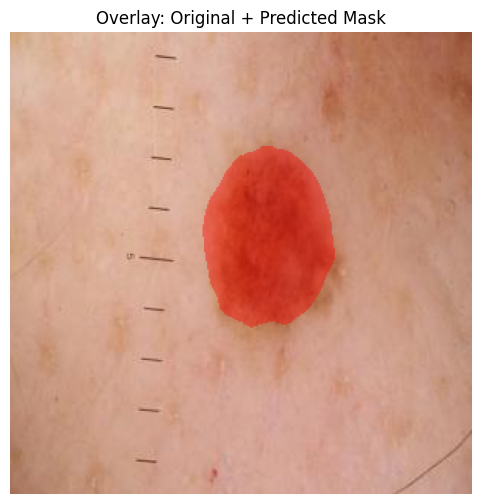

In [17]:
import numpy as np

# Convert original image and mask to NumPy
orig_img_np = np.array(img.resize((300, 300)))  # Make sure dimensions match
mask_np = pred_mask.squeeze().numpy()

# Normalize mask to 0-255 for alpha channel
mask_overlay = (mask_np * 255).astype(np.uint8)

# Create a red overlay mask
red_overlay = np.zeros_like(orig_img_np)
red_overlay[..., 0] = 255  # Red channel only

# Blend: show red where the mask is 1, original where mask is 0
alpha = 0.4  # Transparency
blended = np.where(mask_np[..., None] == 1,
                   (orig_img_np * (1 - alpha) + red_overlay * alpha).astype(np.uint8),
                   orig_img_np)

# Show overlay
plt.figure(figsize=(6, 6))
plt.title("Overlay: Original + Predicted Mask")
plt.imshow(blended)
plt.axis("off")
plt.show()
